In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = sns.load_dataset('titanic')

In [37]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
df = df.drop(['age','embarked','class','who','deck','adult_male','embark_town','alive'], axis = 1)

In [39]:
df

,survived,pclass,sex,sibsp,parch,fare,alone
0,0,3,male,1,0,7.2500,False
1,1,1,female,1,0,71.2833,False
2,1,3,female,0,0,7.9250,True
3,1,1,female,1,0,53.1000,False
4,0,3,male,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,True
887,1,1,female,0,0,30.0000,True
888,0,3,female,1,2,23.4500,False
889,1,1,male,0,0,30.0000,True


In [40]:
df = df.dropna()

In [41]:
df['sex'] = pd.get_dummies(df['sex'], drop_first = True)
df['alone'] = pd.get_dummies(df['alone'], drop_first = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    bool   
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   alone     891 non-null    bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 36.7 KB


In [43]:
df.describe()

,survived,pclass,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


In [44]:
print(df.shape)

(891, 7)


In [45]:
X = df.drop('survived', axis =1)
y = df['survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:

m1 = DecisionTreeClassifier(random_state=42)
m1.fit(X_train,y_train)
y1_pred = m1.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y1_pred))

Accuracy Score: 0.7877094972067039


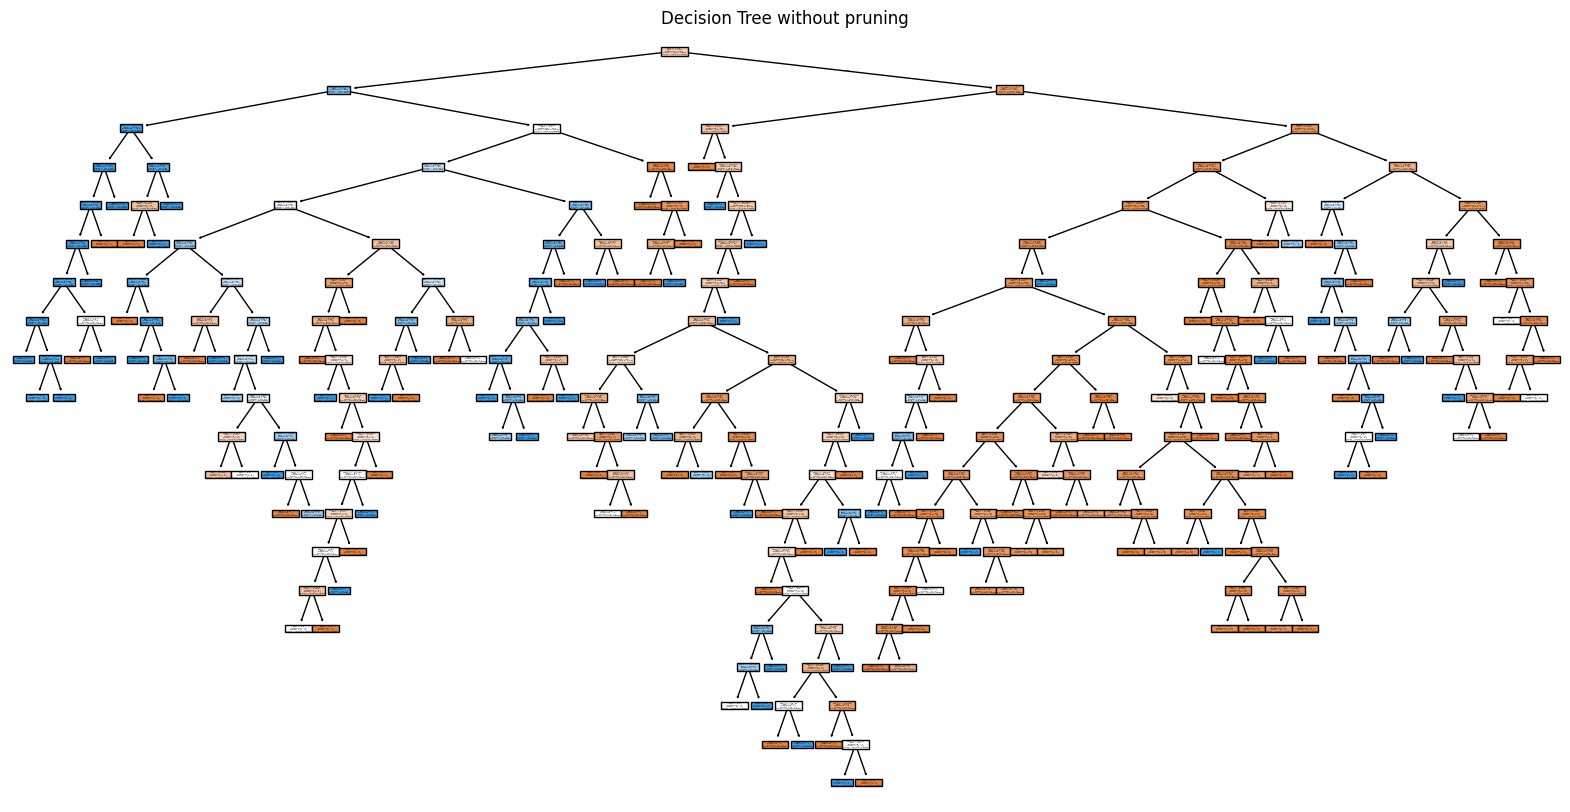

In [48]:
plt.figure(figsize=(20,10))
plot_tree(m1, feature_names=X.columns, class_names=['Not Survived','Survived'],filled=True)
plt.title("Decision Tree without pruning")
plt.show()

In [49]:
m2 = DecisionTreeClassifier(max_depth=5,min_samples_split=10,random_state=42)
m2.fit(X_train,y_train)
y2_pred = m2.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y2_pred))

Accuracy Score: 0.8044692737430168


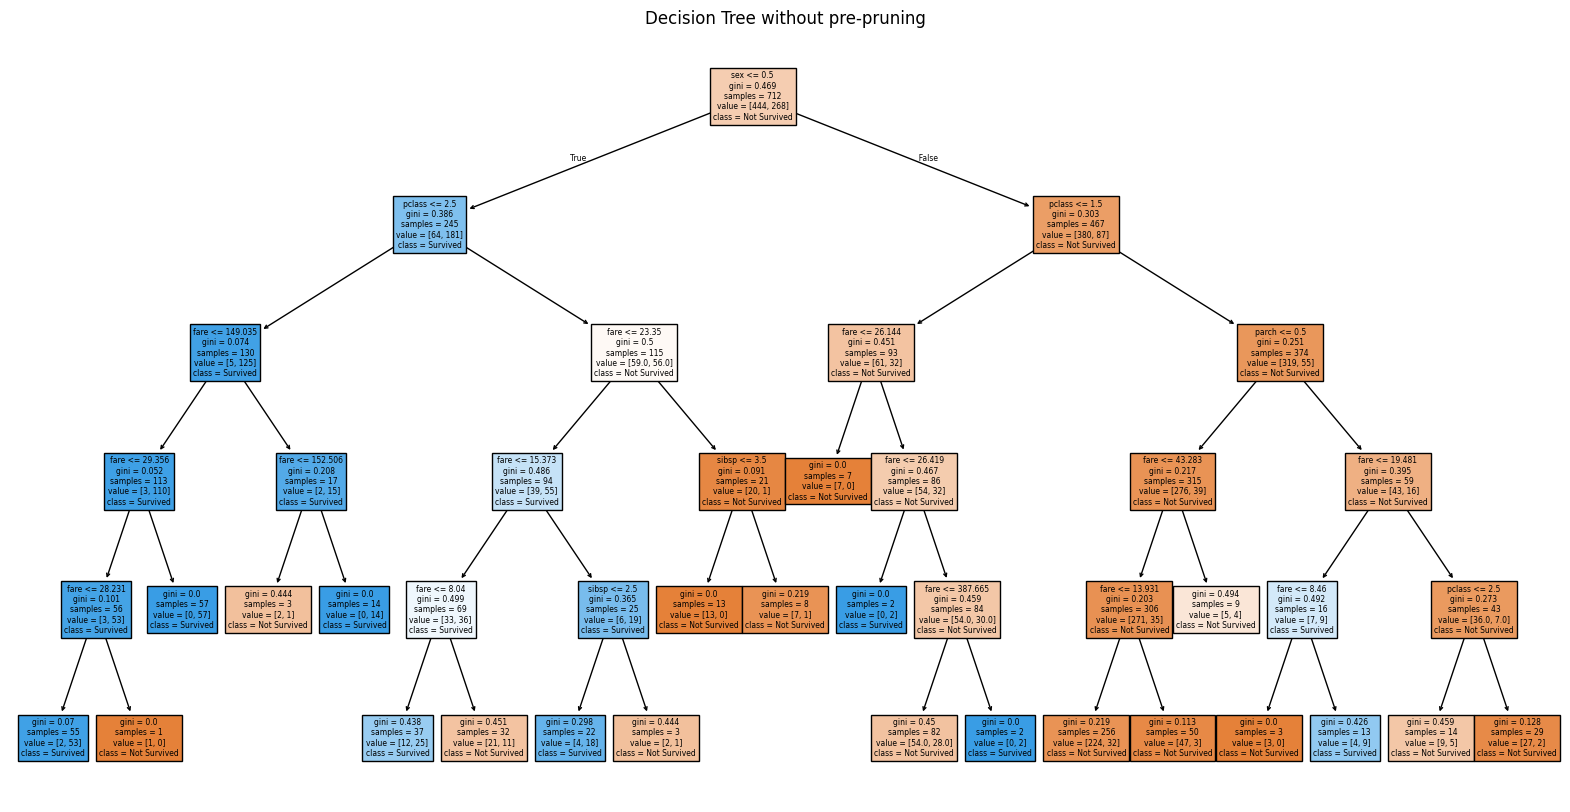

In [50]:
plt.figure(figsize=(20,10))
plot_tree(m2, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.title("Decision Tree without pre-pruning")
plt.show()

In [51]:
m3 = DecisionTreeClassifier(random_state=42)
m3.fit(X_train,y_train)
path=m3.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [52]:
models= [DecisionTreeClassifier(random_state=42,ccp_alpha=alpha).fit(X_train,y_train) for alpha in ccp_alphas]
accuracies=[accuracy_score(y_test, model.predict(X_test) )for model in models]
best_path = ccp_alphas[np.argmax(accuracies)]
best_model=DecisionTreeClassifier(random_state=42, ccp_alpha=best_path)
best_model.fit(X_train,y_train)
y3_pred=best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y3_pred))

Accuracy Score: 0.8156424581005587


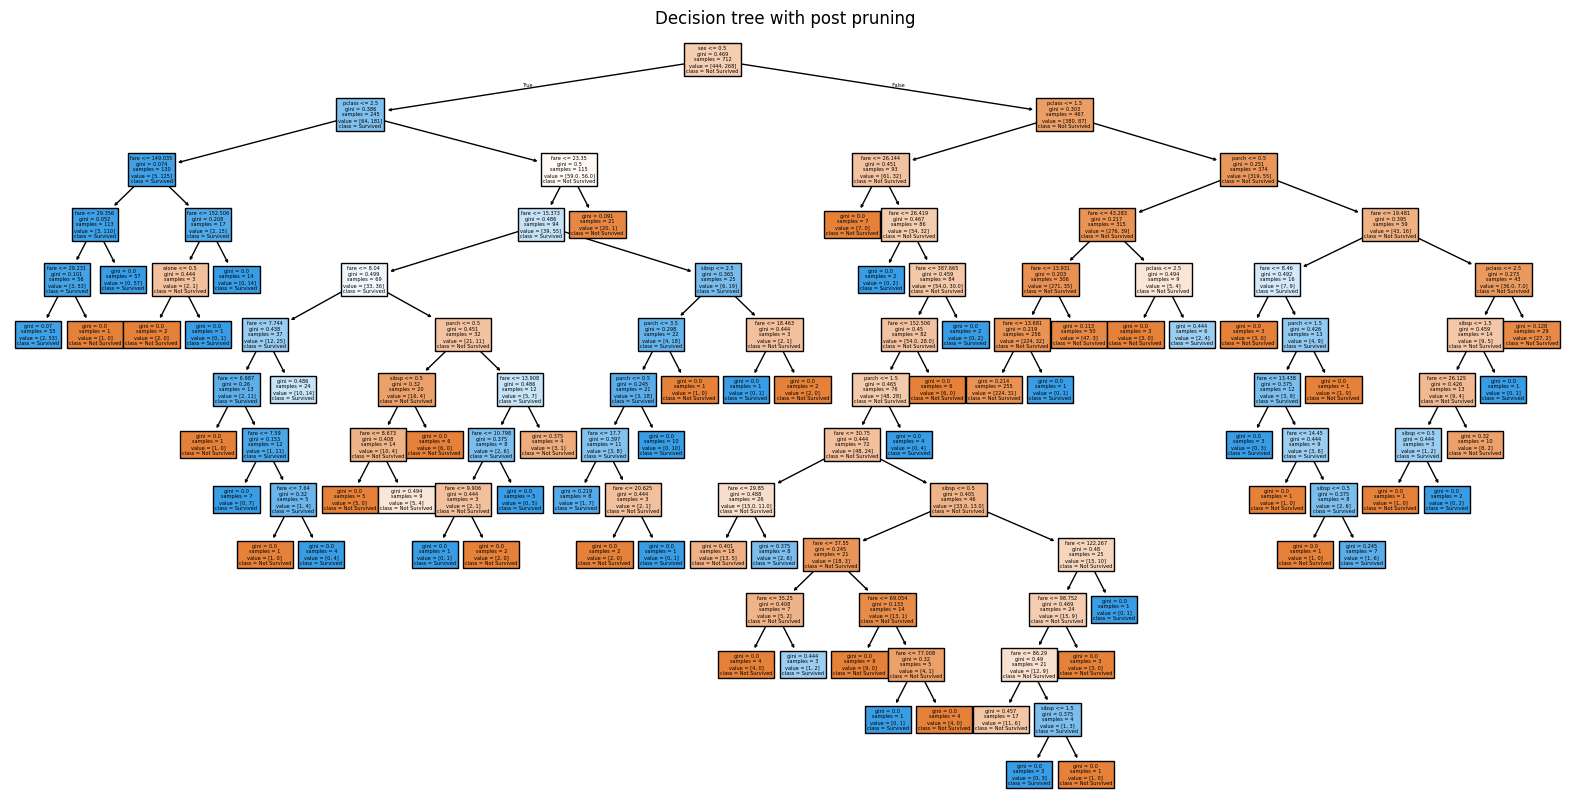

In [53]:
plt.figure(figsize=(20,10))
plot_tree(best_model,feature_names=X.columns, class_names=['Not Survived','Survived'],filled=True)
plt.title("Decision tree with post pruning")
plt.show()

In [54]:
print("Classification report without pruning:\n\n", classification_report(y_test,y1_pred))

Classification report without pruning:

               precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.78      0.68      0.72        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



In [55]:
print("Classification report with pre pruning:\n\n", classification_report(y_test,y2_pred))

Classification report with pre pruning:

               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [56]:
print("Classification report with post pruning:\n\n", classification_report(y_test,y3_pred))

Classification report with post pruning:

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



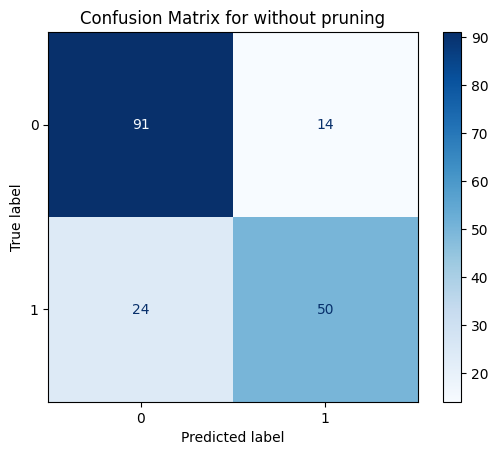

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test,y1_pred, cmap='Blues')
plt.title("Confusion Matrix for without pruning")
plt.show()

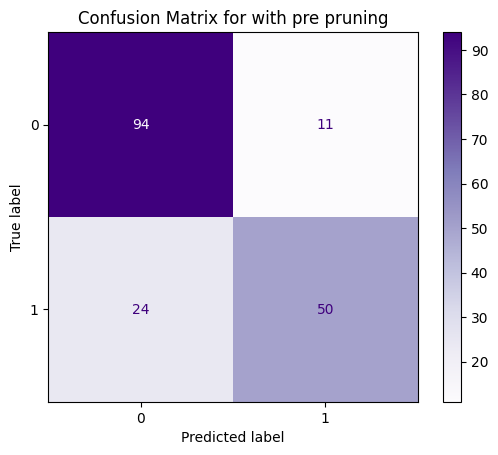

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test,y2_pred, cmap='Purples')
plt.title("Confusion Matrix for with pre pruning")
plt.show()

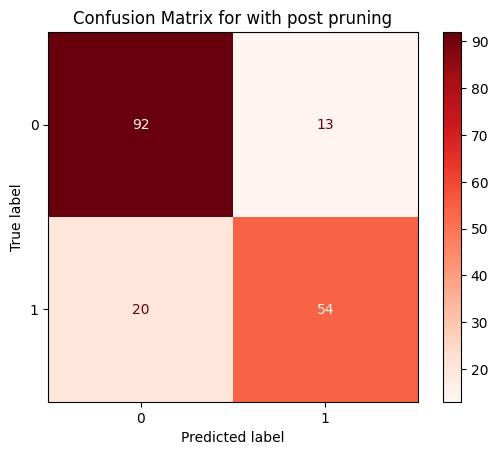

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test,y3_pred, cmap='Reds')
plt.title("Confusion Matrix for with post pruning")
plt.show()